_____________________
<h3><b>6. Nonlinear classifiers</b></h3>

___________________

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import tensorflow as tf #tf version is 1.12
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
#import data
with np.load('features_mobilenet_v2.npz', allow_pickle=False) as npz_file:
    #features
    X_train = npz_file['train_hl']
    X_val = npz_file['validation_hl']
    X_test = npz_file['test_hl']
    #labels
    y_train = npz_file['labels_train']
    y_val = npz_file['labels_validation']
    y_test = npz_file['labels_test']
    #imgs
    train_imgs = npz_file['train_imgs']
    validation_imgs = npz_file['validation_imgs']
    test_imgs = npz_file['test_imgs']
    #paths
    train_imgs_path = npz_file['train_imgs_path']
    valid_imgs_path = npz_file['valid_imgs_path']
    test_imgs_path = npz_file['test_imgs_path']

_____________
><b>6.1. Random forest</b>
___________

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create a decision tree
forest = RandomForestClassifier(
    n_estimators=10, #n_estimators is 10 by default (in version 0.22 will be 100)
    criterion='gini',
    max_depth=3,#max_depth is the same as the previous decision tree
    random_state=0)

# Fit estimate
forest.fit(X_train, y_train)

#get score
forest_accuracy = forest.score(X_test, y_test)
print('accuracy random forest: {:.2f}%'.format(forest_accuracy))

accuracy random forest: 0.78%


In [4]:
#store the accuracy in a df

models_summary = {'model': ['random forest'],
                  'test_accuracy': [forest_accuracy]}
models_summary = pd.DataFrame(models_summary)
models_summary

,model,test_accuracy
0,random forest,0.78


Random forest is the model with the worst accuracy so far. 

Here below I test if increasing the number of trees (n_estimators parameter) returns better results. I will test trees from 0 to 1000 in steps of 10 with a grid search.

In [5]:
# Variable to store the results
forest_results = []

# Grid search
for i in np.arange(10,100,10):
    forest.set_params(n_estimators=i)
    forest.fit(X_train, y_train)
    
    forest_results.append({
        'n_estimators': i,
        'accuracy': forest.score(X_test, y_test),
    })

# Convert results to DataFrame
forest_results = pd.DataFrame(forest_results)

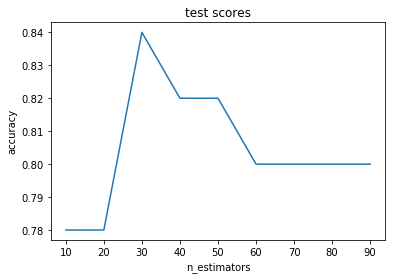

In [6]:
#plot the results
plt.plot(forest_results['n_estimators'], forest_results['accuracy'])
plt.title('test scores')
plt.xlabel('n_estimators')
plt.ylabel('accuracy');

Increasing the number of trees helps till 30 then it starts to decrease

_________________
><b>6.2. SVMs</b>

______________

>><b>6.2.1. Linear kernel</b>

______________

In [7]:
from sklearn.svm import LinearSVC

# Create SVM with linear kernel
linear_svc = LinearSVC()

# Fit estimator
linear_svc.fit(X_train, y_train)

# Get score
linear_kernel_accuracy = linear_svc.score(X_test, y_test)
print('accuracy linear kernel (svm): {:.2f}%'.format(linear_kernel_accuracy))

accuracy linear kernel (svm): 0.90%


In [8]:
#store the accuracy in a df
models_summary = models_summary.append({'model': 'svm linear',
                                        'test_accuracy': linear_kernel_accuracy}, ignore_index=True)
models_summary

,model,test_accuracy
0,random forest,0.78
1,svm linear,0.90


____________
>><b>6.2.2. RBF kernel</b>

__________

In [9]:
from sklearn.svm import SVC

# Create SVM with RBF kernel
rbf_svc = SVC(kernel='rbf', 
              C=1,#C=1 is the default
              gamma = 'auto')#this param silence the warning. It can be either auto or scale. auto = 1 / n_features

# Fit estimator
rbf_svc.fit(X_train, y_train)

# Get score
rbf_kernel_accuracy = rbf_svc.score(X_test, y_test)
print('accuracy rbf kernel (svm): {:.2f}%'.format(rbf_kernel_accuracy))

accuracy rbf kernel (svm): 0.94%


In [10]:
#store the accuracy in a df
models_summary = models_summary.append({'model': 'svm rbf',
                                        'test_accuracy': rbf_kernel_accuracy}, ignore_index=True)
models_summary

,model,test_accuracy
0,random forest,0.78
1,svm linear,0.90
2,svm rbf,0.94


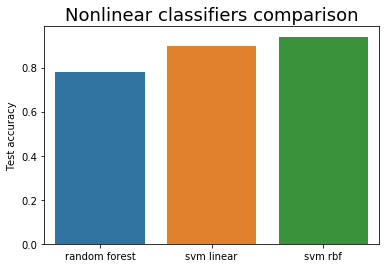

In [11]:
#plot accuracies comparison
sns.barplot(x='model', y='test_accuracy',data=models_summary).set(xlabel=None, ylabel='Test accuracy')
plt.title('Nonlinear classifiers comparison', size=18);#note that the linear kernel is not a nonlinear classifier

In [12]:
models_summary.to_csv("models_summary.csv", mode='a', index=False, header=False)#append to models_summary